In [ ]:
# subreddit crossover
#legacy sql
# SELECT
#   sub_a,
#   sub_b,
#   people,
# FROM (
#   SELECT
#     sub_a,
#     sub_b,
#     people,
#     COUNT(*) OVER(PARTITION BY sub_a) 
#   FROM (
#     SELECT
#       a.subreddit sub_a,
#       b.subreddit sub_b,
#       COUNT(*) people
#     FROM (
#       SELECT
#         author,
#         subreddit,
#         authors
#       FROM
#         FLATTEN((
#           SELECT
#             UNIQUE(author) author,
#             a.subreddit subreddit,
#             FIRST(authors) authors
#           FROM
#             [fh-bigquery:reddit_comments.2019_07] a
#           JOIN
#             [fh-bigquery:reddit_comments.subr_rank_201505] b
#           ON
#             a.subreddit=b.subreddit
#           GROUP EACH BY
#             2 ),
#           author) ) a
#     JOIN EACH (
#       SELECT
#         author,
#         subreddit
#       FROM
#         FLATTEN((
#           SELECT
#             UNIQUE(author) author,
#             subreddit
#           FROM
#             [fh-bigquery:reddit_comments.2019_07]
#           WHERE
#             subreddit IN (
#             SELECT
#               subreddit
#             FROM
#               [fh-bigquery:reddit_comments.subr_rank_201505] )
#           GROUP BY
#             2 ),
#           author) ) b
#     ON
#       a.author=b.author
#     WHERE
#       a.subreddit!=b.subreddit
#       AND ( (a.subreddit='vegan' AND b.subreddit='nfl') OR (a.subreddit ='vegan' AND b.subreddit = 'nba') 
#       OR (a.subreddit = 'vegan' AND b.subreddit = 'Boxing') OR (a.subreddit = 'vegan' AND b.subreddit = 'baseball') OR (a.subreddit = 'vegan' AND b.subreddit = 'soccer'))
#       OR (a.subreddit = 'vegan' AND b.subreddit = 'Conservative') OR (a.subreddit = 'vegan' AND b.subreddit = 'Liberal') OR (a.subreddit = 'vegan' AND b.subreddit = 'programming') 
#       OR (a.subreddit = 'vegan' AND b.subreddit = 'datascience')
#     GROUP EACH BY
#       1,
#       2 ) )
# ORDER BY
#   people DESC
#     #
    
#     #veg score growth

# SELECT AVG(a.score)
# FROM `fh-bigquery.reddit_comments.2005` as a
# WHERE REGEXP_CONTAINS(body, r'(?i).*vegan.*') 
# UNION ALL
# SELECT AVG(b.score)
# FROM `fh-bigquery.reddit_comments.2009` as b
# WHERE REGEXP_CONTAINS(body, r'(?i).*vegan.*')
# UNION ALL
# SELECT AVG(c.score)
# FROM `fh-bigquery.reddit_comments.2013` as c
# WHERE REGEXP_CONTAINS(body, r'(?i).*vegan.*')
# UNION ALL
# SELECT AVG(d.score)
# FROM `fh-bigquery.reddit_comments.2017_1*` as d
# WHERE REGEXP_CONTAINS(body, r'(?i).*vegan.*')
# UNION ALL
# SELECT AVG(e.score)
# FROM `fh-bigquery.reddit_comments.2019*` as e
# WHERE REGEXP_CONTAINS(body, r'(?i).*vegan.*')


# subreddit in( ‘vegan' 'nfl'  'nba'
#       'baseball’,  'soccer'
#       'Conservative’,  'Liberal' , 'Anarchism' , 'programming' , 'datascience'
# GROUP BY subreddit

             
# SELECT month, subreddit, AVG(score), body , COUNT(DISTINCT author), COUNT(body)
# FROM (
# SELECT score,subreddit, author, body, LEFT(STRING(SEC_TO_TIMESTAMP(created_utc)), 7) month
# FROM TABLE_QUERY([fh-bigquery:reddit_comments],
#     "table_id CONTAINS '2018'")
# )
# #((?i).*Recipes).*")
# WHERE REGEXP_MATCH(body, r'(?i).*buffalo cauliflower.*') 
# GROUP EACH BY month, subreddit, body 
 
    
# #This is some of  the sql queries I used

In [78]:
%matplotlib inline
import pandas as pd
import matplotlib
matplotlib.style.use('ggplot')
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv('veganpoliticssports.csv')
veggrowth = pd.read_csv('vegscoregrowth.csv')
nonveggrowth = pd.read_csv('nonvegscoregrowth.csv')
#authorcounts = pd.read_csv('authcount.csv')


In [79]:

#sports = df.loc[('nba', 'nfl', 'soccer', 'baseball', 'boxing'), ('sub_b', 'people')]
#politics = df.loc[['Liberal', 'Conservative', 'Anarchism'], ['sub_b', 'people']]
veggrowth = veggrowth.rename(columns = {"f0_": "vegscore", 
                                     }) 


[Text(0, 0, 'nba'),
 Text(0, 0, 'soccer'),
 Text(0, 0, 'Conservative'),
 Text(0, 0, 'nfl'),
 Text(0, 0, 'baseball'),
 Text(0, 0, 'programming'),
 Text(0, 0, 'Boxing'),
 Text(0, 0, 'datascience'),
 Text(0, 0, 'Liberal')]

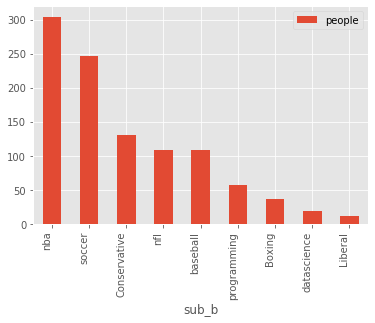

In [89]:
ax = df.plot.bar(x='sub_b', y='people', rot=1)
ax.set_xticklabels(df['sub_b'], rotation = 90, ha="right")

In [81]:
# i need to do this with more data samples ( I only used July 2019 data) I also need to include author counts for the subs in order to normalize the data
#I want to test the null hypothesis that vegans on reddit aren't on r/conservative as they r/liberal. According to my sample, there is WAY MORE conservative crossover than there is liberal, even though r/conservative only has around 3 times more subscribers
veggrowth['years'] = pd.Series([2005,2009,2013,2017,2019])
veggrowth['C'] = pd.Series([1, 1.5, 3.5, 4, 5])

veggrowth.head()



,vegscore,years,C
0,3.545109,2005,1.0
1,4.345169,2009,1.5
2,5.567328,2013,3.5
3,8.143629,2017,4.0
4,8.653762,2019,5.0


In [84]:
nonveggrowth = nonveggrowth.rename(columns = {"f0_": "nonvegscore", 
                                        }) 
nonveggrowth['years'] = pd.Series([2005,2009,2013,2017,2019])

nonveggrowth.head()

,nonvegscore,years
0,1.562791,2005
1,3.833102,2009
2,8.826347,2013
3,5.657964,2017
4,8.107228,2019


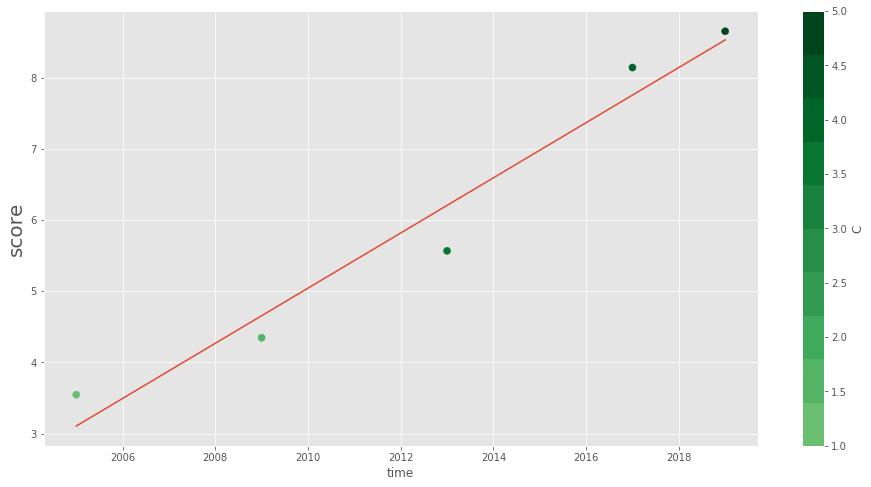

In [82]:
fig, ax = plt.subplots(figsize = (16,8))
cmap = matplotlib.cm.Greens(np.linspace(0,1,20))
cmap = matplotlib.colors.ListedColormap(cmap[10:,:-1])
#ax.scatter(x = veggrowth.index, veggrowth['vegscore'], lw=2, marker='.', markersize=10, title='Comment score with word vegan in them')
graph = veggrowth.plot(kind="scatter", x="years", y ="vegscore", c="C", cmap = cmap, s = 50, ax = ax)
ax.set_xlabel("time",fontsize = 30) # fix time 
ax.set_ylabel("score", fontsize = 24)
x = veggrowth['years',fontsize = 24]
y = veggrowth['vegscore']
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x,p(x))

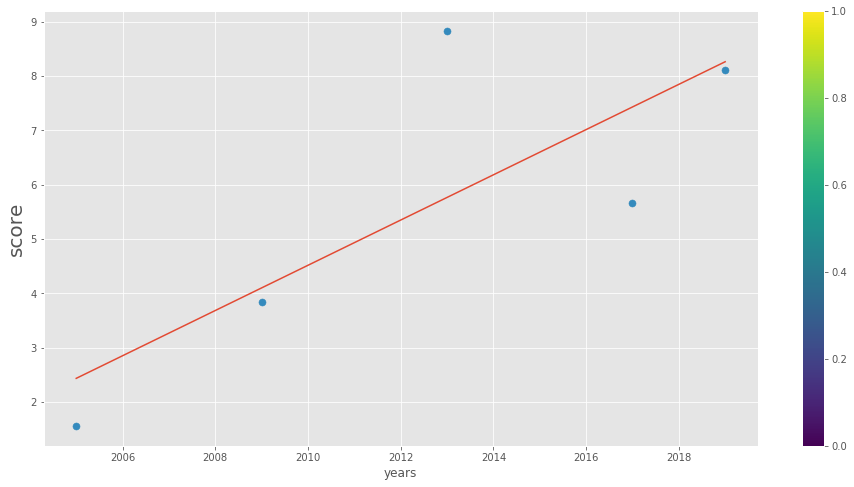

In [86]:
fig, ax = plt.subplots(figsize = (16,8))
cmap = matplotlib.cm.Reds(np.linspace(0,1,20))
cmap = matplotlib.colors.ListedColormap(cmap[10:,:-1])
#ax.scatter(x = veggrowth.index, veggrowth['vegscore'], lw=2, marker='.', markersize=10, title='Comment score with word vegan in them')
graph = nonveggrowth.plot(kind="scatter", x="years", y ="nonvegscore", c="C", cmap = cmap, s = 50, ax = ax)
ax.set_xlabel("years", fontsize = 22) # fix time 
ax.set_ylabel("score", fontsize = 22)
x = nonveggrowth['years']
y = nonveggrowth['nonvegscore']
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x,p(x))